In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df = df.rename(columns = {'ID#':'ID','Award?':'Award'})

In [4]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df = df.drop(['ID','Award'],axis = 1)

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()

In [8]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
dtypes: int64(10)
memory usage: 343.6 KB


In [10]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000


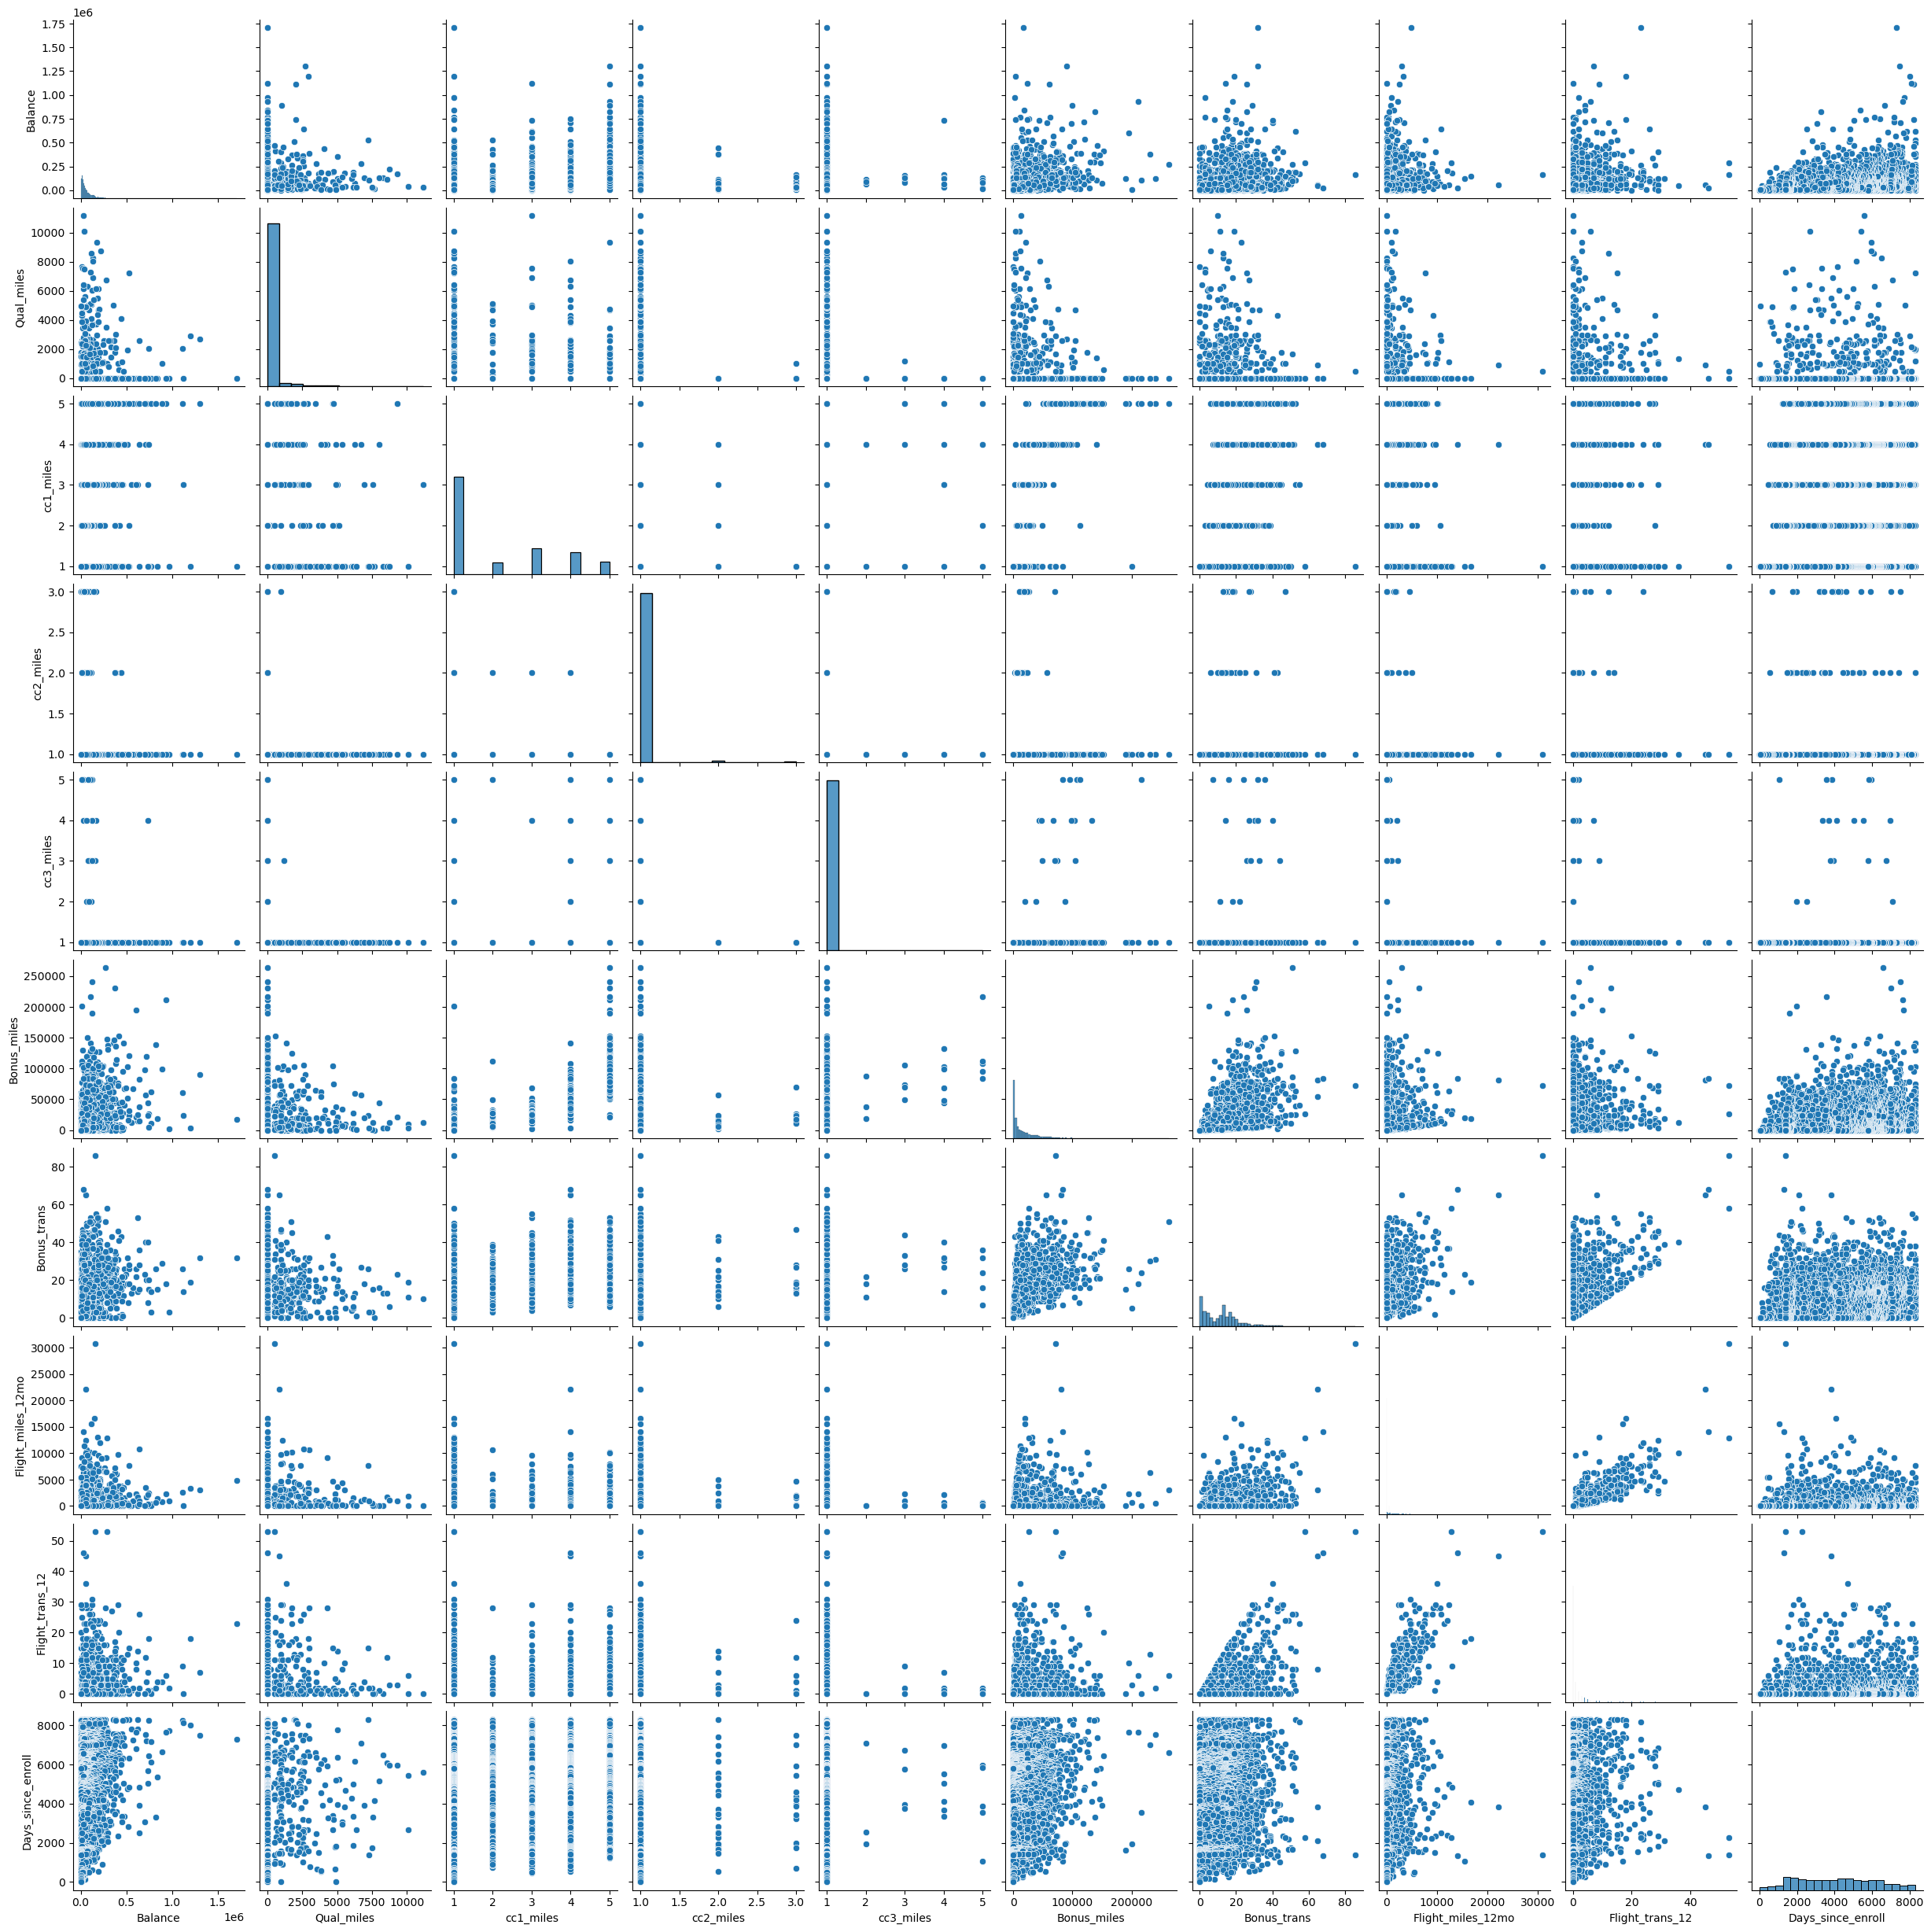

In [11]:
sns.pairplot(data = df)

In [12]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000


In [13]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [14]:
df.iloc[:,0:13] = SS.fit_transform(df)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506
3995,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381
3996,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990
3997,-0.185776,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,0.028446,-0.098583,-1.316475


In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')

In [16]:
Y = cluster.fit_predict(df)
Y = pd.DataFrame(Y)
Y.value_counts()

0    3953
1      28
2      15
3       1
4       1
dtype: int64

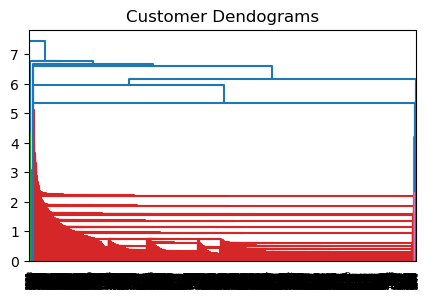

In [17]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (5,3))
plt.title('Customer Dendograms')
dend = shc.dendrogram(shc.linkage(df,method='single'))
plt.show()

In [18]:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(df)
Y = pd.DataFrame(Y)
Y.value_counts()

0    3951
2      15
4      15
3      13
1       4
dtype: int64

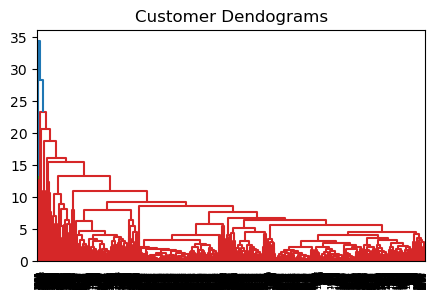

In [19]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (5,3))
plt.title('Customer Dendograms')
dend = shc.dendrogram(shc.linkage(df,method='complete'))
plt.show()

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [21]:
kmeans = kmeans.fit(df)

In [22]:
Y = kmeans.predict(df)

In [23]:
Y = pd.DataFrame(Y)
Y.value_counts()

0    2478
2    1345
1     160
3      15
dtype: int64

In [24]:
p1 = kmeans.inertia_
print(p1)

23803.15550977154


In [25]:
clust = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df)
    clust.append(int(kmeans.inertia_))

print(clust)

[39979, 32081, 27553, 23803, 20345, 17721, 15868, 14357, 13246, 12143, 11459, 10961, 10482, 10073, 9636, 9349, 8928, 8636, 8316]


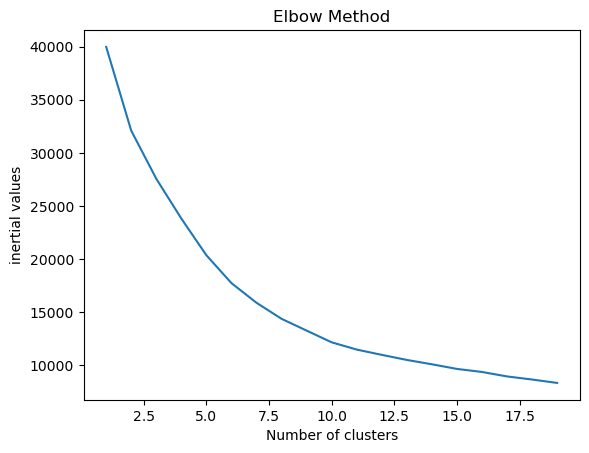

In [26]:
plt.plot(range(1,20), clust)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

In [27]:
from sklearn.cluster import DBSCAN
DBSCAN()

DBSCAN()

In [28]:
dbscan = DBSCAN(eps=6, min_samples=2)
dbscan.fit(df)

DBSCAN(eps=6, min_samples=2)

In [29]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
cl=pd.DataFrame(dbscan.labels_,columns=['Cluster'])
cl.value_counts()

Cluster
 0         3949
 1           28
 2           15
-1            4
 3            2
dtype: int64

In [31]:
df_new = pd.concat([df,cl],axis=1)
df_new = df_new.drop([3876,3998],axis=0)

In [32]:
df_new.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Cluster              0
dtype: int64

In [33]:
df_new

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,0.0
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,0.0
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,0.0
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,0.0
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.691139,-0.186323,-0.769732,-0.098254,-0.062774,-0.695011,-0.896142,-0.328649,-0.362219,-1.318412,0.0
3994,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,0.0
3995,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,0.0
3996,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,0.0


In [34]:
noisedata = df_new[df_new['Cluster']==-1]

In [35]:
finaldata = df_new[df_new['Cluster']==0]
finaldata

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,-0.451294,-0.186323,-0.769732,-0.098254,-0.062774,-0.702920,-1.104430,-0.328649,-0.362219,1.395235,0.0
1,-0.539605,-0.186323,-0.769732,-0.098254,-0.062774,-0.701223,-1.000286,-0.328649,-0.362219,1.379736,0.0
2,-0.320192,-0.186323,-0.769732,-0.098254,-0.062774,-0.539397,-0.791997,-0.328649,-0.362219,1.411702,0.0
3,-0.583944,-0.186323,-0.769732,-0.098254,-0.062774,-0.689421,-1.104430,-0.328649,-0.362219,1.371987,0.0
4,0.239483,-0.186323,1.409207,-0.098254,-0.062774,1.082876,1.499179,1.154721,0.692324,1.363754,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.691139,-0.186323,-0.769732,-0.098254,-0.062774,-0.695011,-0.896142,-0.328649,-0.362219,-1.318412,0.0
3994,-0.547226,-0.186323,-0.769732,-0.098254,-0.062774,-0.357115,-0.791997,-0.185811,-0.098583,-1.315506,0.0
3995,-0.091640,-0.186323,-0.769732,-0.098254,-0.062774,-0.669503,-0.687853,-0.328649,-0.362219,-1.319381,0.0
3996,-0.000223,-0.186323,0.682894,-0.098254,-0.062774,0.343605,-0.375420,-0.328649,-0.362219,-1.315990,0.0


# Conclusion

 - I have applied EDA to analyse dataset. Discovered correlation between variables and found no multicollinearity issues.

 - Applied Standardazation transformation on the data to perform Cluster analysis effectively.

 - I have used and analysed three clustering techniques on dataset.. 
   i) Agglomerative,ii) Kmean, iii)DBSCAN   

- Agglomarative clustering of Hierarchical method performed on the data with single linkage method, which does not provided proper clusters.
   So applied complete linkage method.

  - Also applied Kmeans clustering and found inertia. Then plotted the inertia with number of clusters.

 - Kmean clustering sensitive for the outliers so tried using DBSCAN clustering which gives proper informstion about the noise points.

 - The best numer of clusters for the data set is 4.
 Concluded this after comparing above clustering method results.